# Bike sharing ML Model
## Project by Pratik Thombre

In [3504]:
import warnings
warnings.filterwarnings('ignore')

# Imports

In [3505]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

# Understanding Data

In [3506]:
ori_data = pd.read_csv('/Users/gt/Desktop/IIITB/day.csv')
ori_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3507]:
ori_data.shape

(730, 16)

In [3508]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3509]:
ori_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Dictionary


	- instant    : record index
	- dteday     : date
	- season     : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr         : year (0: 2018, 1:2019)
	- mnth       : month ( 1 to 12)
	- holiday    : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday    : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit : 
		      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp       : temperature in Celsius
	- atemp      : feeling temperature in Celsius
	- hum        : humidity
	- windspeed  : wind speed
	- casual     : count of casual users
	- registered : count of registered users
	- cnt        : count of total rental bikes including both casual and registered

# Data Cleaning & Manipulation

In [3510]:
ori_data.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [3511]:
# Creating a copy of the original data.
import copy
data = copy.deepcopy(ori_data)

In [3512]:
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# EDA

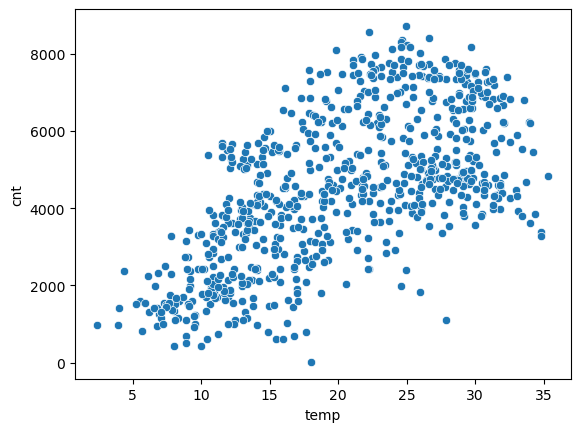

In [3513]:
sns.scatterplot(data=data, x='temp', y='cnt')
plt.show()

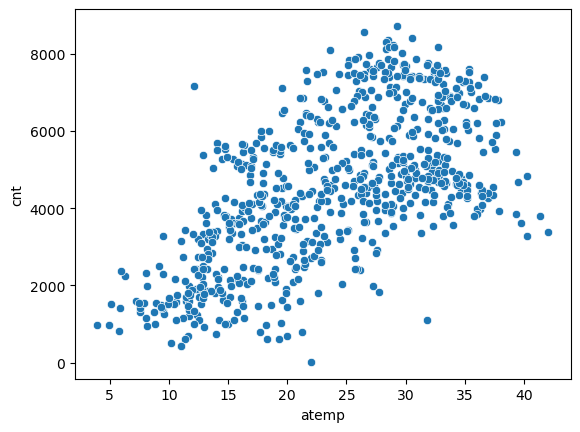

In [3514]:
sns.scatterplot(data=data, x='atemp', y='cnt')
plt.show()

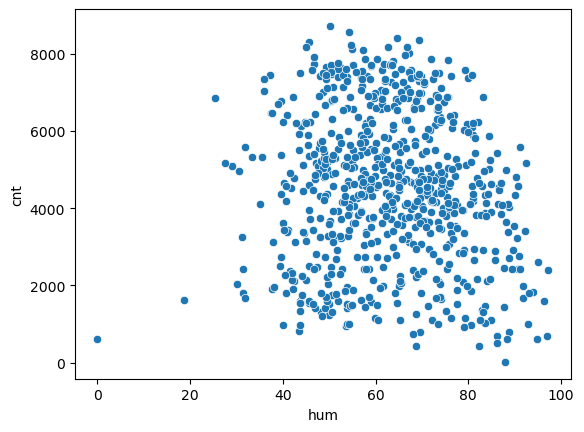

In [3515]:
sns.scatterplot(data=data, x='hum', y='cnt')
plt.show()

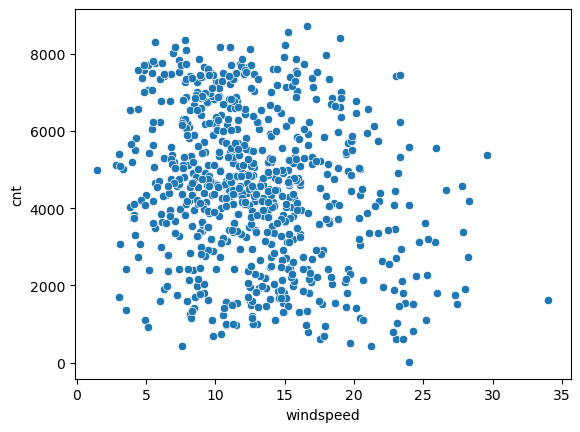

In [3516]:
sns.scatterplot(data=data, x='windspeed', y='cnt')
plt.show()

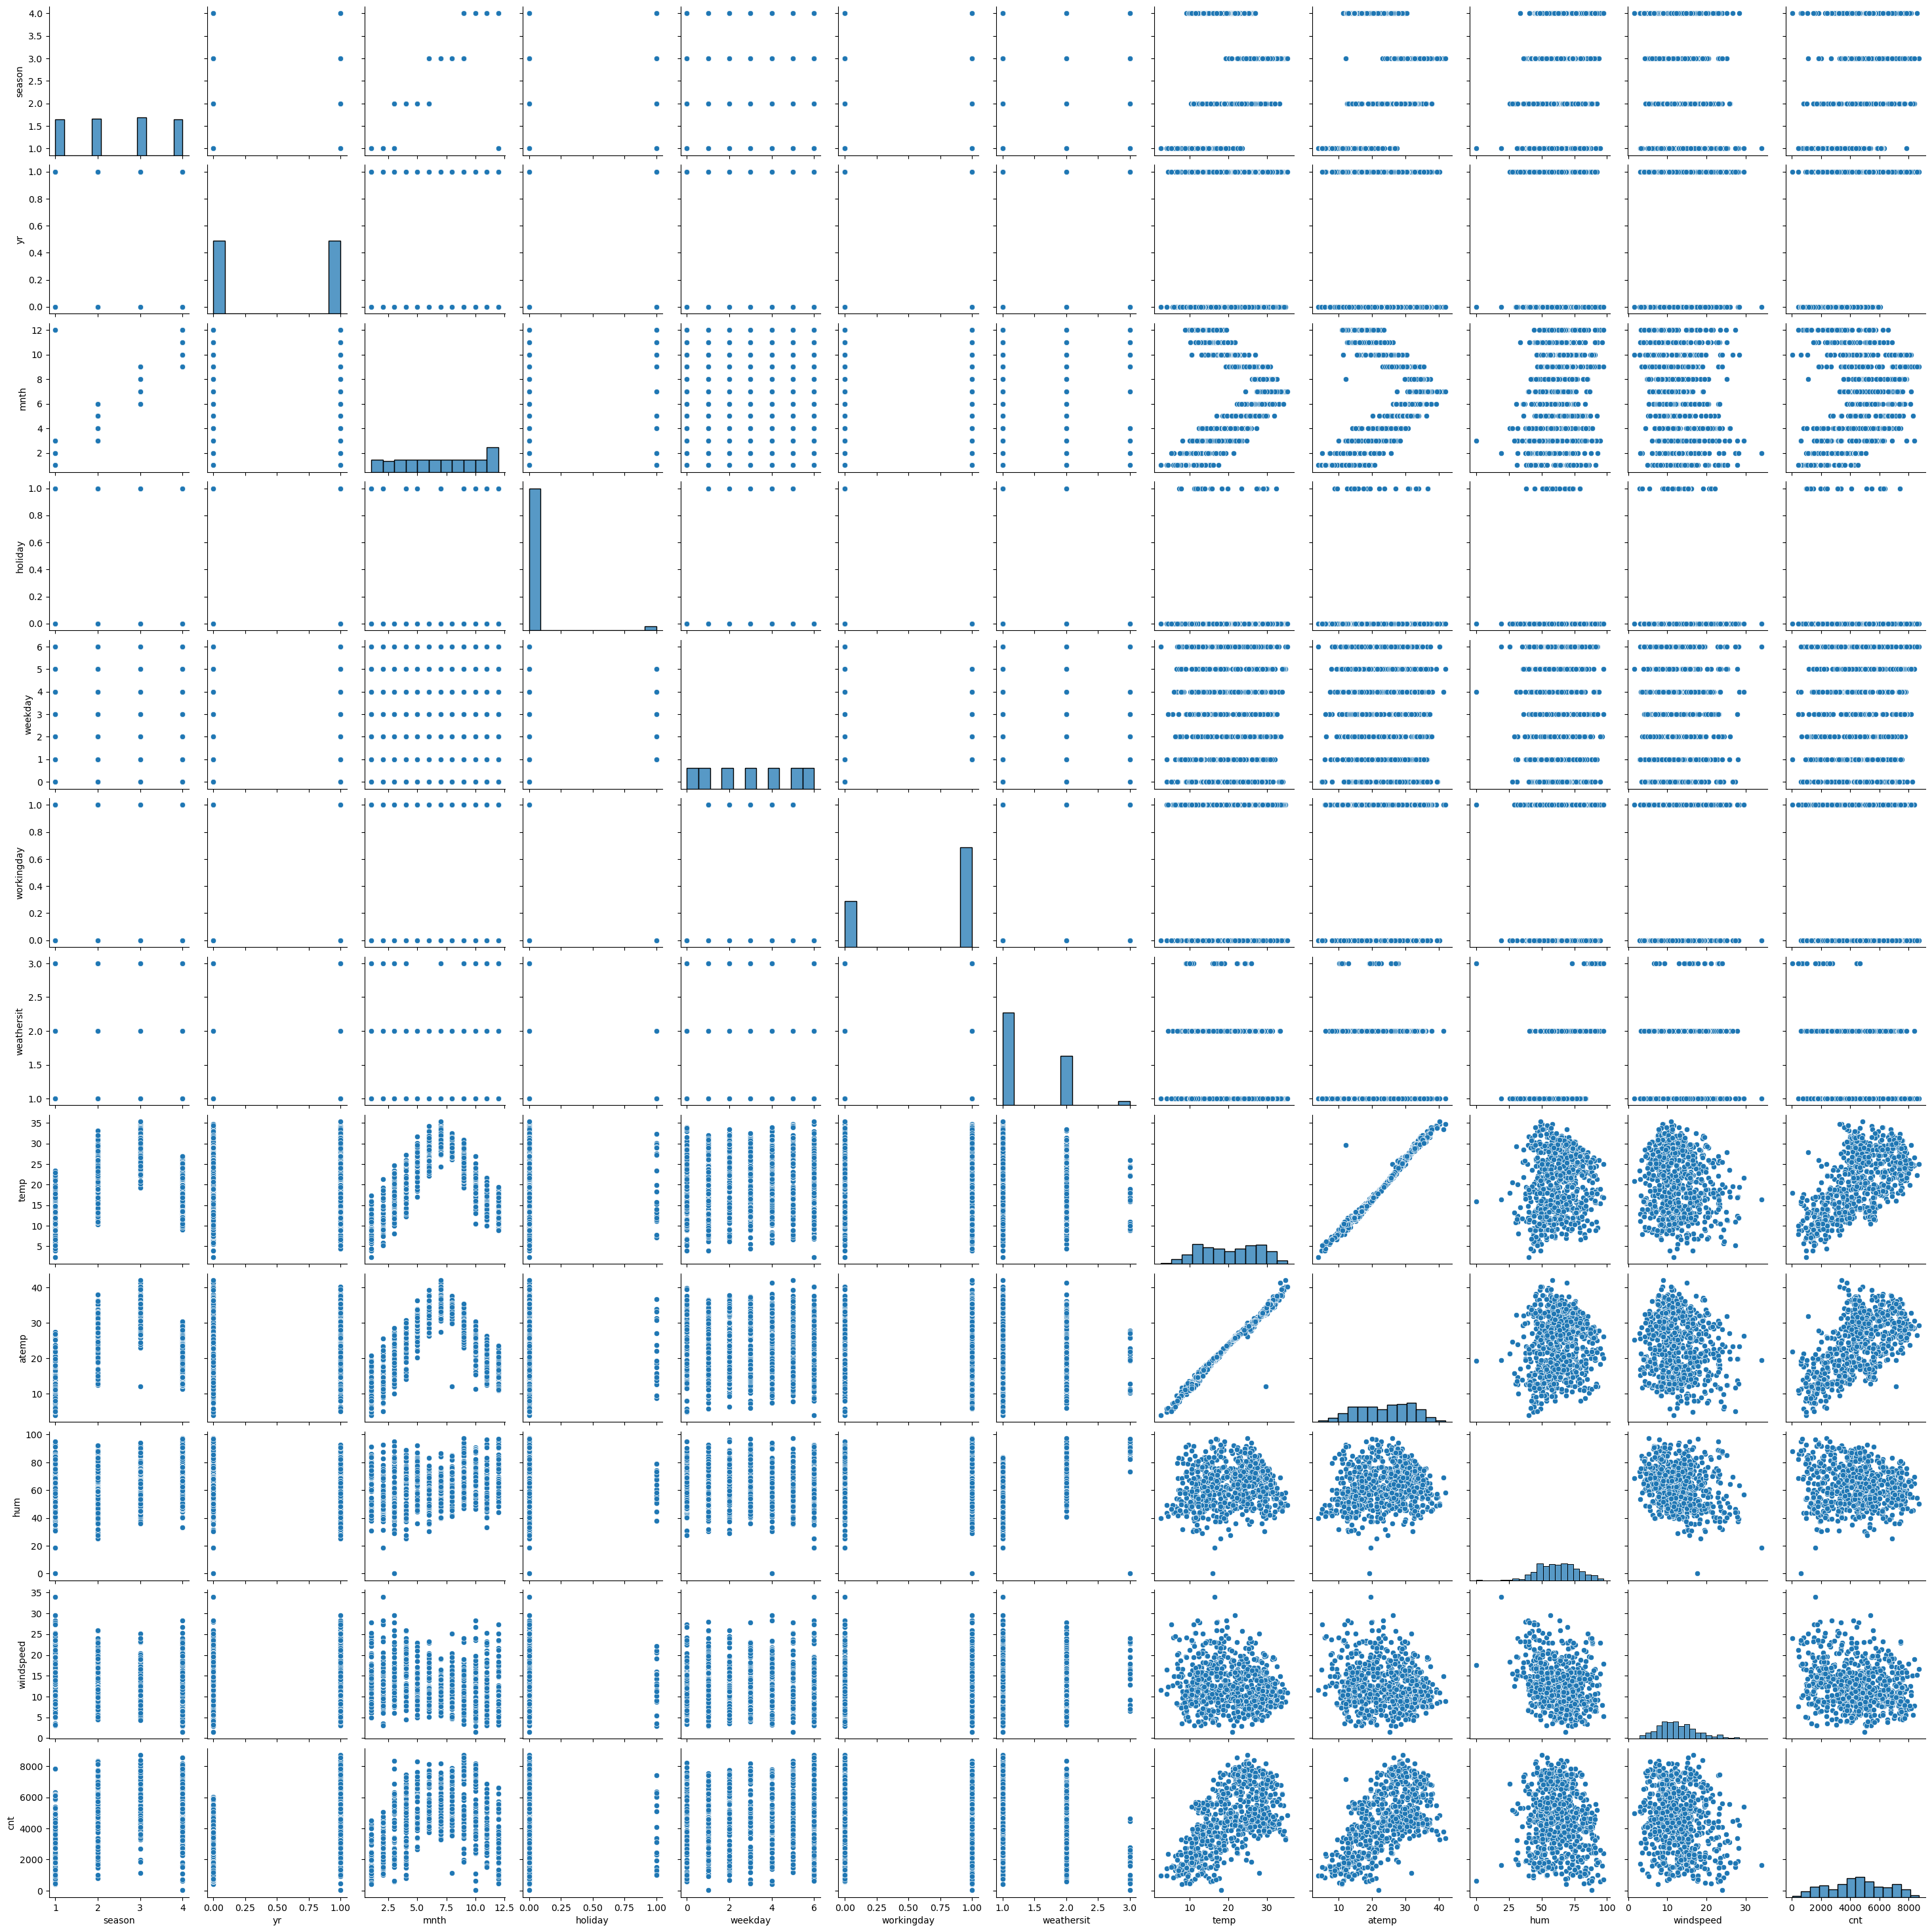

In [3517]:
sns.pairplot(data)
plt.show()

## Dropping variable

In [3518]:
data.season.unique()

array([1, 2, 3, 4])

In [3519]:
cols_to_be_dropped = ['temp']
data.drop(cols_to_be_dropped, axis=1, inplace=True)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


## Creating dummy variables

### season

In [3520]:
season_dict = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter',
}

# Mapping to get the real value
data['season'] = data['season'].map(season_dict)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [3521]:
data.season.unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [3522]:
# creating dummy
season_dummy_df = pd.get_dummies(data['season'], drop_first = True)
season_dummy_df.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [3523]:
# Adding dummy dataframe with the data
data = pd.concat([data, season_dummy_df], axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,1,0,0


In [3524]:
# Dropping 'season' column
data.drop(['season'], axis=1, inplace=True)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,1,0,6,0,2,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600,1,0,0


### Weekday

In [3525]:
weekday_dict = {
    0: 'sunday',
    1: 'monday',
    2: 'tuesday',
    3: 'wednesday',
    4: 'thursday',
    5: 'friday',
    6: 'saturday'
}

# Mapping to get the real value
data['weekday'] = data['weekday'].map(weekday_dict)

data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,1,0,saturday,0,2,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,sunday,0,2,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,monday,1,1,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,tuesday,1,1,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,wednesday,1,1,11.46350,43.6957,12.522300,1600,1,0,0


In [3526]:
data.weekday.unique()

array(['saturday', 'sunday', 'monday', 'tuesday', 'wednesday', 'thursday',
       'friday'], dtype=object)

In [3527]:
# creating dummy
weekday_dummy_df = pd.get_dummies(data['weekday'], drop_first = True)
weekday_dummy_df.head()

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [3528]:
# Adding dummy dataframe with the data
data = pd.concat([data, weekday_dummy_df], axis=1)
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,saturday,0,2,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0
1,0,1,0,sunday,0,2,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0
2,0,1,0,monday,1,1,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0
3,0,1,0,tuesday,1,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0
4,0,1,0,wednesday,1,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1


In [3529]:
# Dropping 'season' column
data.drop(['weekday'], axis=1, inplace=True)
data.head()

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,2,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0
1,0,1,0,0,2,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0
2,0,1,0,1,1,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0
3,0,1,0,1,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0
4,0,1,0,1,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1


### weathersit

In [3530]:
weathersit = {
    1: 'cleaar',
    2: 'mist',
    3: 'snow',
}

# Mapping to get the real value
data['weathersit'] = data['weathersit'].map(weathersit)

data.head()

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,mist,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0
1,0,1,0,0,mist,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0
2,0,1,0,1,cleaar,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0
3,0,1,0,1,cleaar,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0
4,0,1,0,1,cleaar,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1


In [3531]:
data.weathersit.unique()

array(['mist', 'cleaar', 'snow'], dtype=object)

In [3532]:
# creating dummy
weather_dummy_df = pd.get_dummies(data['weathersit'], drop_first = True)
weather_dummy_df.head()

,mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [3533]:
# Adding dummy dataframe with the data
data = pd.concat([data, weather_dummy_df], axis=1)
data.head()

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
0,0,1,0,0,mist,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,mist,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0
2,0,1,0,1,cleaar,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,cleaar,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,cleaar,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0


In [3534]:
# Dropping 'season' column
data.drop(['weathersit'], axis=1, inplace=True)
data.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
0,0,1,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,1,0
2,0,1,0,1,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0


# Data Splitting

In [3535]:
df_train, df_test = train_test_split(data, train_size=0.7, random_state=10)

In [3536]:
# Training Data
df_train.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
72,0,3,0,1,16.60000,49.6957,9.174042,2046,1,0,0,1,0,0,0,0,0,0,0
510,1,5,0,0,32.13480,73.2500,13.332464,6536,0,1,0,0,1,0,0,0,0,0,0
700,1,12,0,0,17.96040,82.3333,8.333393,4649,0,0,1,0,0,1,0,0,0,1,0
264,0,9,0,1,27.74815,90.2083,8.584375,4795,0,0,0,0,0,0,1,0,0,1,0
577,1,8,0,1,33.36540,67.7500,9.458993,7580,0,0,0,0,0,0,0,0,1,0,0


In [3537]:
# Test Data
df_test.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
566,1,7,0,0,27.49560,86.5417,14.291100,4459,0,0,0,0,1,0,0,0,0,0,1
374,1,1,0,1,15.94130,64.6522,12.565984,3598,1,0,0,0,0,0,0,1,0,0,0
181,0,7,0,1,32.60810,39.6250,6.874736,5362,0,0,0,0,0,0,0,0,0,0,0
529,1,6,0,1,31.21915,56.9583,17.000111,7363,0,1,0,0,0,0,1,0,0,0,0
233,0,8,0,1,31.91270,47.0000,18.542250,4758,0,0,0,1,0,0,0,0,0,0,0


# Feature Scaling

In [3538]:
df_train.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
72,0,3,0,1,16.60000,49.6957,9.174042,2046,1,0,0,1,0,0,0,0,0,0,0
510,1,5,0,0,32.13480,73.2500,13.332464,6536,0,1,0,0,1,0,0,0,0,0,0
700,1,12,0,0,17.96040,82.3333,8.333393,4649,0,0,1,0,0,1,0,0,0,1,0
264,0,9,0,1,27.74815,90.2083,8.584375,4795,0,0,0,0,0,0,1,0,0,1,0
577,1,8,0,1,33.36540,67.7500,9.458993,7580,0,0,0,0,0,0,0,0,1,0,0


In [3539]:
scaler = MinMaxScaler()

features_to_scale = ['mnth', 'atemp', 'hum', 'windspeed', 'cnt']

# Performing feature scaling
df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])

df_train.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
72,0,0.181818,0,1,0.311594,0.393891,0.236118,0.194978,1,0,0,1,0,0,0,0,0,0,0
510,1,0.363636,0,0,0.731886,0.694105,0.364071,0.737052,0,1,0,0,1,0,0,0,0,0,0
700,1,1.000000,0,0,0.348399,0.809877,0.210252,0.509236,0,0,1,0,0,1,0,0,0,1,0
264,0,0.727273,0,1,0.613206,0.910249,0.217975,0.526862,0,0,0,0,0,0,1,0,0,1,0
577,1,0.636364,0,1,0.765180,0.624004,0.244886,0.863093,0,0,0,0,0,0,0,0,1,0,0


# Creating X & Y for train data

In [3540]:
x_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt']

In [3541]:
x_train.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
72,0,0.181818,0,1,0.311594,0.393891,0.236118,1,0,0,1,0,0,0,0,0,0,0
510,1,0.363636,0,0,0.731886,0.694105,0.364071,0,1,0,0,1,0,0,0,0,0,0
700,1,1.000000,0,0,0.348399,0.809877,0.210252,0,0,1,0,0,1,0,0,0,1,0
264,0,0.727273,0,1,0.613206,0.910249,0.217975,0,0,0,0,0,0,1,0,0,1,0
577,1,0.636364,0,1,0.765180,0.624004,0.244886,0,0,0,0,0,0,0,0,1,0,0


In [3542]:
y_train.head()

72     0.194978
510    0.737052
700    0.509236
264    0.526862
577    0.863093
Name: cnt, dtype: float64

# Model Building

## Model Building using RFE - Feature Selection

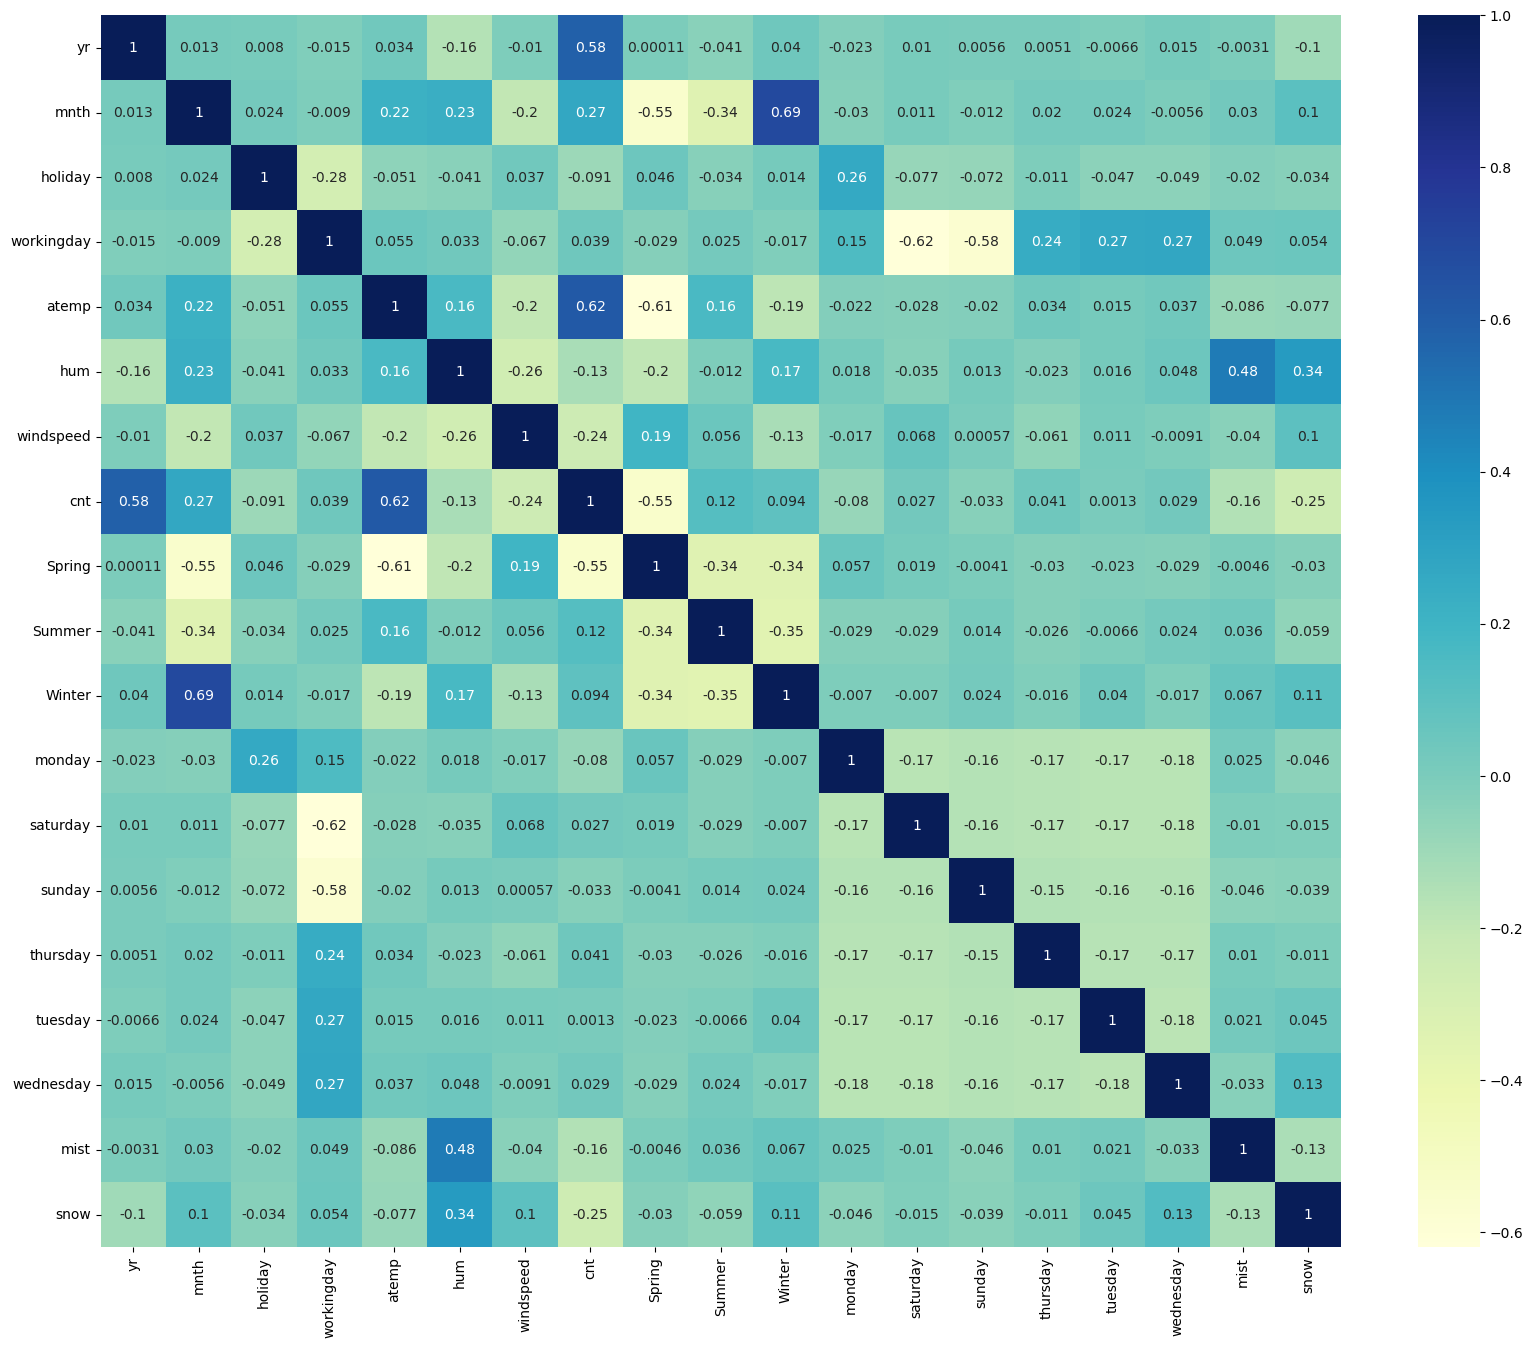

In [3543]:
fig, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot = True, ax=ax)
plt.show()

From above, we can infer that there are around 4 variables which have very good correlation (> +-0.50) with the target variable which are

    1. yr
    2. temp
    3. atemp
    4. spring
    
and There are some which have a considerable correlation (> +-0.25) which are:

    1. mnth
    2. windspeed
    3. weather_3
    
So, for rfe, we can start with 8 variables and observe the statistics using Stat Model.

In [3544]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3545]:
# Creating linear regression model object
lm = LinearRegression()

lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=8)

rfe = rfe.fit(x_train, y_train)

In [3546]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('mnth', False, 6),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 2),
 ('Summer', False, 8),
 ('Winter', False, 4),
 ('monday', False, 7),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 10),
 ('tuesday', False, 9),
 ('wednesday', False, 11),
 ('mist', False, 5),
 ('snow', False, 3)]

In [3547]:
cols_selected_by_RFE = x_train.columns[rfe.support_]
cols_selected_by_RFE

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'saturday',
       'sunday'],
      dtype='object')

## Model Building using Stats Model for Statistics

### 1st Model

In [3548]:
# creating x_train with the columns selected by the RFE for stats model
x_train_rfe = x_train #[cols_selected_by_RFE]
x_train_rfe.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
72,0,0.181818,0,1,0.311594,0.393891,0.236118,1,0,0,1,0,0,0,0,0,0,0
510,1,0.363636,0,0,0.731886,0.694105,0.364071,0,1,0,0,1,0,0,0,0,0,0
700,1,1.000000,0,0,0.348399,0.809877,0.210252,0,0,1,0,0,1,0,0,0,1,0
264,0,0.727273,0,1,0.613206,0.910249,0.217975,0,0,0,0,0,0,1,0,0,1,0
577,1,0.636364,0,1,0.765180,0.624004,0.244886,0,0,0,0,0,0,0,0,1,0,0


In [3549]:
''' Don't add constant in the same data variable rather create new as we 'll be needing that for VIF '''

# Adding a constant variable
import statsmodels.api as sm
x_train_rfe_sm = sm.add_constant(x_train_rfe)
x_train_rfe_sm.head()

,const,yr,mnth,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
72,1.0,0,0.181818,0,1,0.311594,0.393891,0.236118,1,0,0,1,0,0,0,0,0,0,0
510,1.0,1,0.363636,0,0,0.731886,0.694105,0.364071,0,1,0,0,1,0,0,0,0,0,0
700,1.0,1,1.000000,0,0,0.348399,0.809877,0.210252,0,0,1,0,0,1,0,0,0,1,0
264,1.0,0,0.727273,0,1,0.613206,0.910249,0.217975,0,0,0,0,0,0,1,0,0,1,0
577,1.0,1,0.636364,0,1,0.765180,0.624004,0.244886,0,0,0,0,0,0,0,0,1,0,0


In [3550]:
# Creating a linear model
lm = sm.OLS(y_train, x_train_rfe_sm).fit()

In [3551]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     143.0
Date:                Fri, 19 May 2023   Prob (F-statistic):          7.95e-178
Time:                        22:50:00   Log-Likelihood:                 467.13
No. Observations:                 510   AIC:                            -898.3
Df Residuals:                     492   BIC:                            -822.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2103      0.030      6.911      0.000       0.151       0.270
yr             0.2495      0.009     27.745      0.000       0.232       0.267
mnth          -0.0232      0.025     -0.929      0.353      -0.072       0.026
holiday       -0.0019      0.023     -0.084      0.933      -0.047       0.043
workingday     0.0802      0.012      6.657      0.000       0.057       0.104
atemp          0.5174      0.037     14.162      0.000       0.446       0.589
hum           -0.1365      0.035     -3.873      0.000      -0.206      -0.067
windspeed     -0.1548      0.030     -5.220      0.000      -0.213      -0.097
Spring        -0.1193      0.023     -5.089      0.000      -0.165      -0.073
Summer         0.0180      0.016      1.125      0.261      -0.013       0.049
Winter         0.0808      0.018      4.443      0.000       0.045       0.116
monday        -0.0286      0.017     -1.713      0.087      -0.062       0.004
saturday       0.0905      0.014      6.657      0.000       0.064       0.117
sunday         0.0415      0.014      2.936      0.003       0.014       0.069
thursday      -0.0053      0.017     -0.316      0.752      -0.038       0.028
tuesday       -0.0126      0.016     -0.768      0.443      -0.045       0.020
wednesday     -0.0016      0.016     -0.098      0.922      -0.034       0.031
mist          -0.0502      0.012     -4.209      0.000      -0.074      -0.027
snow          -0.1973      0.030     -6.598      0.000      -0.256      -0.139
==============================================================================
Omnibus:                       71.582   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.721
Skew:                          -0.746   Prob(JB):                     1.70e-36
Kurtosis:                       5.351   Cond. No.                     8.90e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Dropping variables with very low corelation

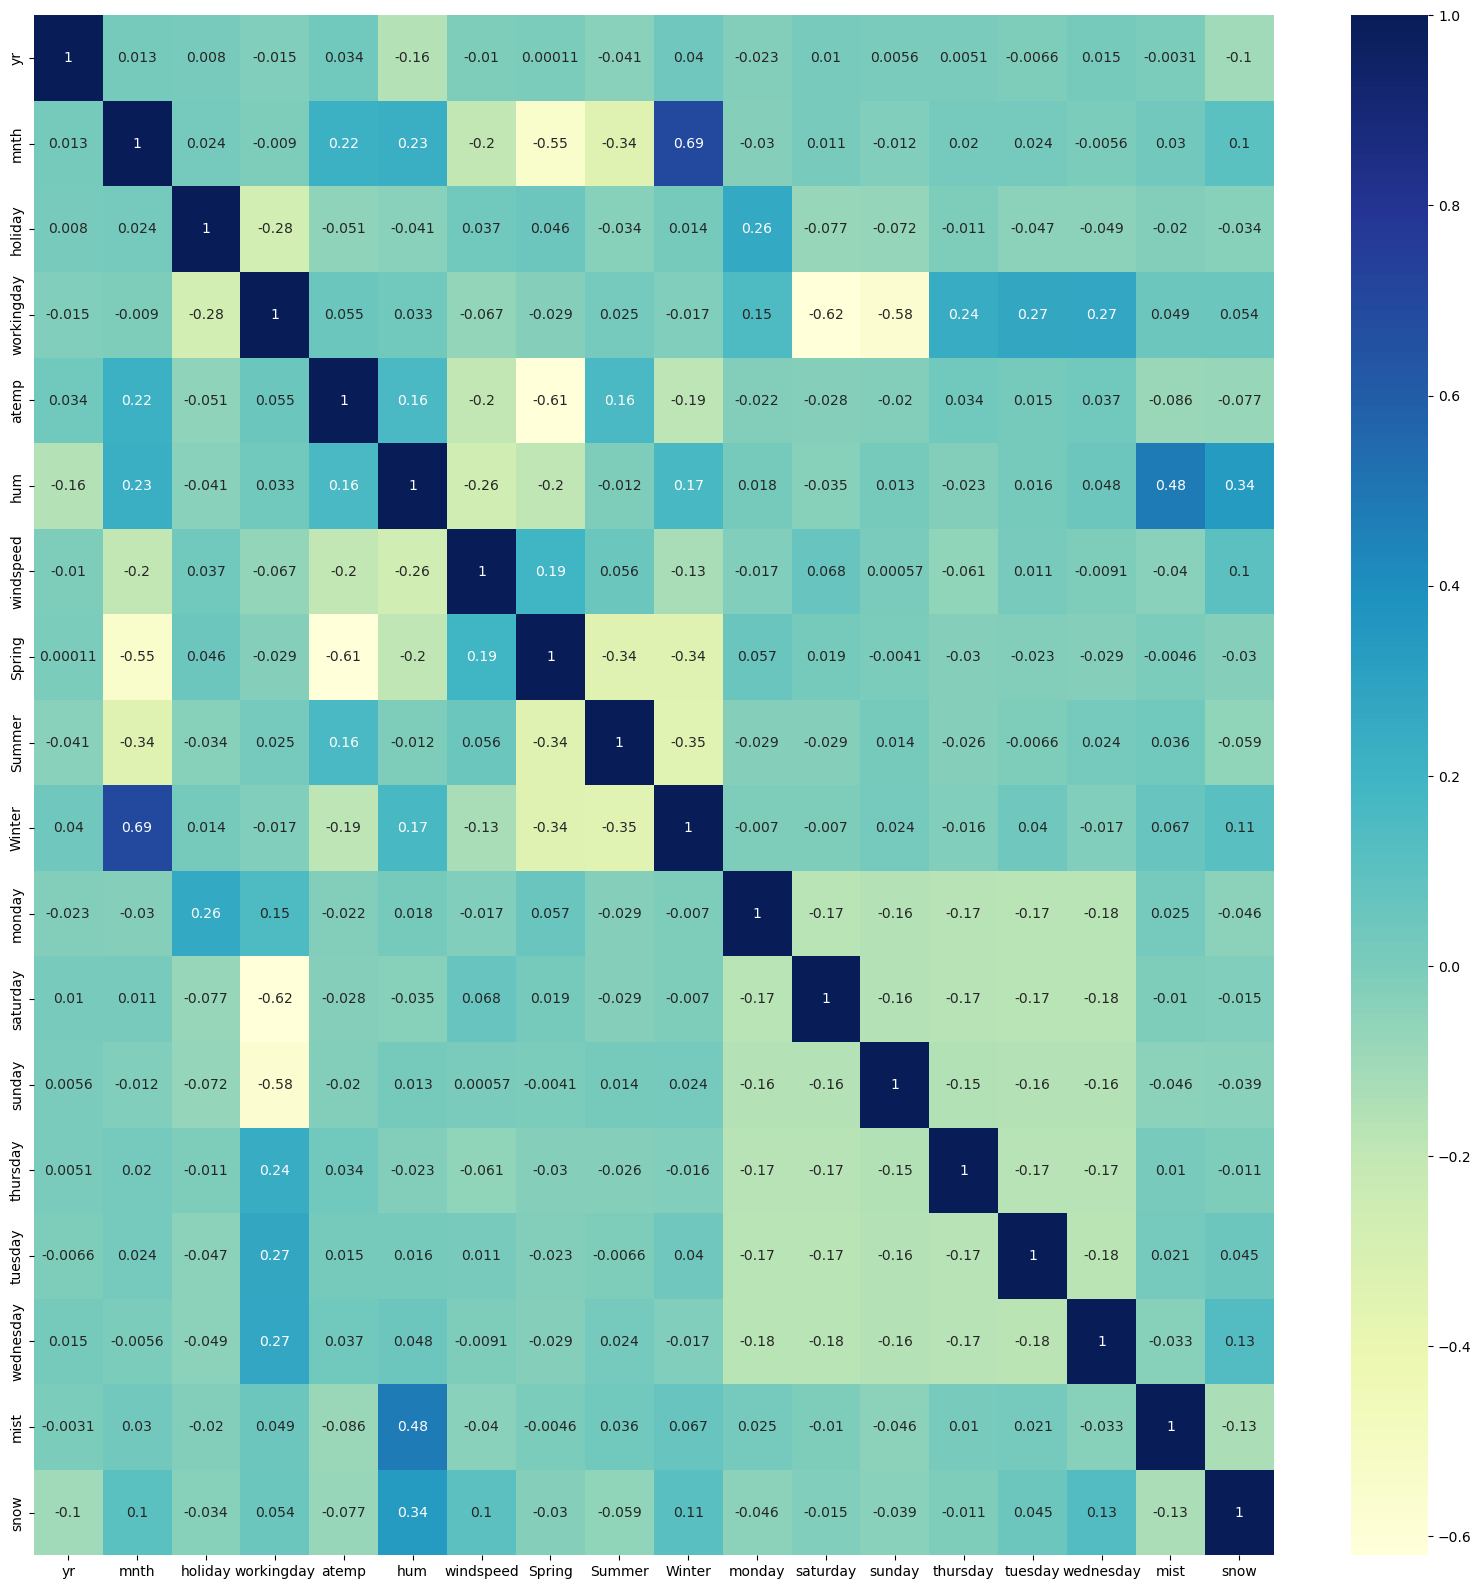

In [3552]:
# Heatmap to understand colinearity b/w variables
plt.figure(figsize=(20, 20))
sns.heatmap(x_train_rfe.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [3553]:
x_train_rfe.drop(['saturday', 'sunday', 'monday', 'Spring'], axis=1, inplace=True)
x_train_rfe.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,Summer,Winter,thursday,tuesday,wednesday,mist,snow
72,0,0.181818,0,1,0.311594,0.393891,0.236118,0,0,0,0,0,0,0
510,1,0.363636,0,0,0.731886,0.694105,0.364071,1,0,0,0,0,0,0
700,1,1.000000,0,0,0.348399,0.809877,0.210252,0,1,0,0,0,1,0
264,0,0.727273,0,1,0.613206,0.910249,0.217975,0,0,1,0,0,1,0
577,1,0.636364,0,1,0.765180,0.624004,0.244886,0,0,0,0,1,0,0


### 2nd Model

In [3554]:
x_train_rfe.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,Summer,Winter,thursday,tuesday,wednesday,mist,snow
72,0,0.181818,0,1,0.311594,0.393891,0.236118,0,0,0,0,0,0,0
510,1,0.363636,0,0,0.731886,0.694105,0.364071,1,0,0,0,0,0,0
700,1,1.000000,0,0,0.348399,0.809877,0.210252,0,1,0,0,0,1,0
264,0,0.727273,0,1,0.613206,0.910249,0.217975,0,0,1,0,0,1,0
577,1,0.636364,0,1,0.765180,0.624004,0.244886,0,0,0,0,1,0,0


In [3555]:
# Adding a constant variable
import statsmodels.api as sm
x_train_rfe_sm_2 = sm.add_constant(x_train_rfe)
x_train_rfe_sm_2.head()

,const,yr,mnth,holiday,workingday,atemp,hum,windspeed,Summer,Winter,thursday,tuesday,wednesday,mist,snow
72,1.0,0,0.181818,0,1,0.311594,0.393891,0.236118,0,0,0,0,0,0,0
510,1.0,1,0.363636,0,0,0.731886,0.694105,0.364071,1,0,0,0,0,0,0
700,1.0,1,1.000000,0,0,0.348399,0.809877,0.210252,0,1,0,0,0,1,0
264,1.0,0,0.727273,0,1,0.613206,0.910249,0.217975,0,0,1,0,0,1,0
577,1.0,1,0.636364,0,1,0.765180,0.624004,0.244886,0,0,0,0,1,0,0


In [3556]:
# Creating 2nd Model
lm_2 = sm.OLS(y_train, x_train_rfe_sm_2).fit()

In [3557]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     159.8
Date:                Fri, 19 May 2023   Prob (F-statistic):          2.38e-173
Time:                        22:50:01   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -867.0
Df Residuals:                     495   BIC:                            -803.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1439      0.027      5.240      0.000       0.090       0.198
yr             0.2468      0.009     26.588      0.000       0.229       0.265
mnth           0.0371      0.023      1.601      0.110      -0.008       0.083
holiday       -0.0976      0.026     -3.699      0.000      -0.149      -0.046
workingday    -0.0045      0.012     -0.365      0.715      -0.029       0.020
atemp          0.6477      0.027     24.249      0.000       0.595       0.700
hum           -0.1656      0.036     -4.585      0.000      -0.237      -0.095
windspeed     -0.1576      0.031     -5.147      0.000      -0.218      -0.097
Summer         0.0766      0.011      6.703      0.000       0.054       0.099
Winter         0.1224      0.016      7.444      0.000       0.090       0.155
thursday       0.0135      0.015      0.903      0.367      -0.016       0.043
tuesday        0.0024      0.015      0.167      0.868      -0.026       0.031
wednesday      0.0149      0.015      1.016      0.310      -0.014       0.044
mist          -0.0434      0.012     -3.532      0.000      -0.068      -0.019
snow          -0.1792      0.031     -5.827      0.000      -0.240      -0.119
==============================================================================
Omnibus:                       51.993   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.855
Skew:                          -0.595   Prob(JB):                     1.70e-23
Kurtosis:                       4.876   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF

In [3558]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hum,12.81
4,atemp,9.89
1,mnth,9.43
3,workingday,4.80
6,windspeed,3.69
8,Winter,3.46
12,mist,2.35
0,yr,1.98
7,Summer,1.63
11,wednesday,1.61


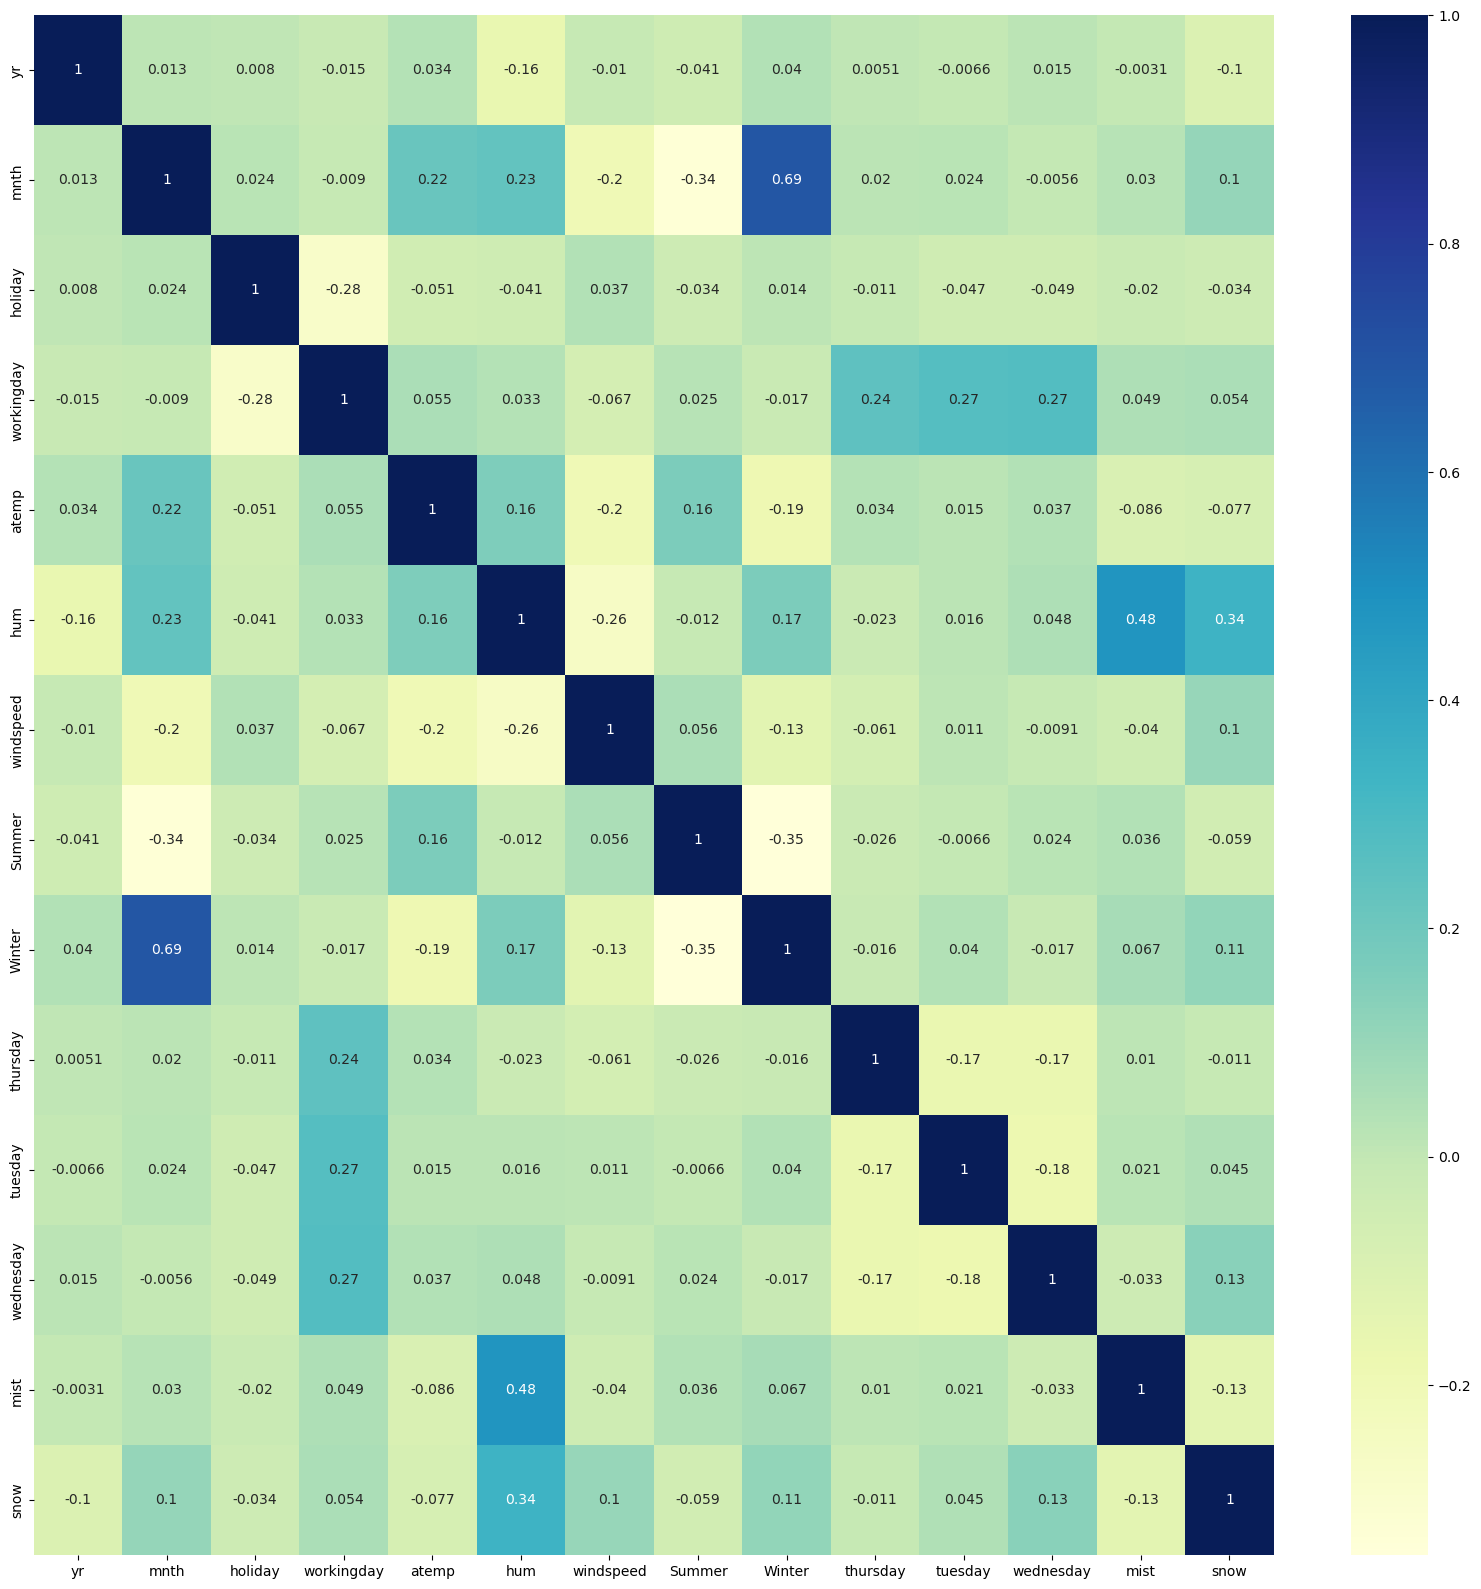

In [3559]:
# Heatmap to understand colinearity b/w variables
plt.figure(figsize=(20, 20))
sns.heatmap(x_train_rfe.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Plotting the model on training data

In [3560]:
x_train_rfe_sm_2.head()

,const,yr,mnth,holiday,workingday,atemp,hum,windspeed,Summer,Winter,thursday,tuesday,wednesday,mist,snow
72,1.0,0,0.181818,0,1,0.311594,0.393891,0.236118,0,0,0,0,0,0,0
510,1.0,1,0.363636,0,0,0.731886,0.694105,0.364071,1,0,0,0,0,0,0
700,1.0,1,1.000000,0,0,0.348399,0.809877,0.210252,0,1,0,0,0,1,0
264,1.0,0,0.727273,0,1,0.613206,0.910249,0.217975,0,0,1,0,0,1,0
577,1.0,1,0.636364,0,1,0.765180,0.624004,0.244886,0,0,0,0,1,0,0


In [3561]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     159.8
Date:                Fri, 19 May 2023   Prob (F-statistic):          2.38e-173
Time:                        22:50:02   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -867.0
Df Residuals:                     495   BIC:                            -803.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1439      0.027      5.240      0.000       0.090       0.198
yr             0.2468      0.009     26.588      0.000       0.229       0.265
mnth           0.0371      0.023      1.601      0.110      -0.008       0.083
holiday       -0.0976      0.026     -3.699      0.000      -0.149      -0.046
workingday    -0.0045      0.012     -0.365      0.715      -0.029       0.020
atemp          0.6477      0.027     24.249      0.000       0.595       0.700
hum           -0.1656      0.036     -4.585      0.000      -0.237      -0.095
windspeed     -0.1576      0.031     -5.147      0.000      -0.218      -0.097
Summer         0.0766      0.011      6.703      0.000       0.054       0.099
Winter         0.1224      0.016      7.444      0.000       0.090       0.155
thursday       0.0135      0.015      0.903      0.367      -0.016       0.043
tuesday        0.0024      0.015      0.167      0.868      -0.026       0.031
wednesday      0.0149      0.015      1.016      0.310      -0.014       0.044
mist          -0.0434      0.012     -3.532      0.000      -0.068      -0.019
snow          -0.1792      0.031     -5.827      0.000      -0.240      -0.119
==============================================================================
Omnibus:                       51.993   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.855
Skew:                          -0.595   Prob(JB):                     1.70e-23
Kurtosis:                       4.876   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residual Analysis of Training Data

To check if the error terms are normally distributed or not

In [3562]:
# Predicting 'y-value' of training data (with constant)
y_train_pred = lm_2.predict(x_train_rfe_sm_2)
y_train_pred.shape

(510,)

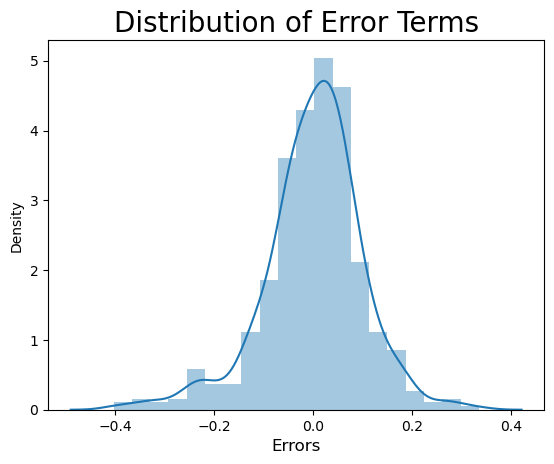

In [3563]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Distribution of Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 12)
plt.show()

This indicates that error terms are normally distributed. Therefore, our model is correct and 'll make good predictions.

# Making Predictions

In [3564]:
df_test.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,monday,saturday,sunday,thursday,tuesday,wednesday,mist,snow
566,1,7,0,0,27.49560,86.5417,14.291100,4459,0,0,0,0,1,0,0,0,0,0,1
374,1,1,0,1,15.94130,64.6522,12.565984,3598,1,0,0,0,0,0,0,1,0,0,0
181,0,7,0,1,32.60810,39.6250,6.874736,5362,0,0,0,0,0,0,0,0,0,0,0
529,1,6,0,1,31.21915,56.9583,17.000111,7363,0,1,0,0,0,0,1,0,0,0,0
233,0,8,0,1,31.91270,47.0000,18.542250,4758,0,0,0,1,0,0,0,0,0,0,0


## Droping columns from test

In [3566]:
df_test.drop(['saturday', 'sunday', 'monday', 'Spring'], axis=1, inplace=True)
df_test.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Winter,thursday,tuesday,wednesday,mist,snow
566,1,7,0,0,27.49560,86.5417,14.291100,4459,0,0,0,0,0,0,1
374,1,1,0,1,15.94130,64.6522,12.565984,3598,0,0,0,1,0,0,0
181,0,7,0,1,32.60810,39.6250,6.874736,5362,0,0,0,0,0,0,0
529,1,6,0,1,31.21915,56.9583,17.000111,7363,1,0,1,0,0,0,0
233,0,8,0,1,31.91270,47.0000,18.542250,4758,0,0,0,0,0,0,0


## Applying scaling on test data

In [3567]:
features_to_scale = ['mnth', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])
df_test.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,Summer,Winter,thursday,tuesday,wednesday,mist,snow
566,1,0.545455,0,0,0.606373,0.863516,0.393568,0.486297,0,0,0,0,0,0,1
374,1,0.000000,0,1,0.293773,0.584521,0.340487,0.382349,0,0,0,1,0,0,0
181,0,0.545455,0,1,0.744691,0.265533,0.165370,0.595316,0,0,0,0,0,0,0
529,1,0.454545,0,1,0.707113,0.486457,0.476922,0.836895,1,0,1,0,0,0,0
233,0,0.636364,0,1,0.725877,0.359532,0.524373,0.522395,0,0,0,0,0,0,0


## Creating X & Y for test data

In [3568]:
x_test = df_test.drop('cnt', axis=1)
y_test = df_test['cnt']

In [3569]:
x_test.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,Summer,Winter,thursday,tuesday,wednesday,mist,snow
566,1,0.545455,0,0,0.606373,0.863516,0.393568,0,0,0,0,0,0,1
374,1,0.000000,0,1,0.293773,0.584521,0.340487,0,0,0,1,0,0,0
181,0,0.545455,0,1,0.744691,0.265533,0.165370,0,0,0,0,0,0,0
529,1,0.454545,0,1,0.707113,0.486457,0.476922,1,0,1,0,0,0,0
233,0,0.636364,0,1,0.725877,0.359532,0.524373,0,0,0,0,0,0,0


In [3570]:
print(y_test.head())
print(y_test.shape)

566    0.486297
374    0.382349
181    0.595316
529    0.836895
233    0.522395
Name: cnt, dtype: float64
(220,)


## Creating required 'x_test' Data

In [3571]:
# Making test data using columns choosen by the final model
x_test = x_test[x_train_rfe.columns]
x_test.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,Summer,Winter,thursday,tuesday,wednesday,mist,snow
566,1,0.545455,0,0,0.606373,0.863516,0.393568,0,0,0,0,0,0,1
374,1,0.000000,0,1,0.293773,0.584521,0.340487,0,0,0,1,0,0,0
181,0,0.545455,0,1,0.744691,0.265533,0.165370,0,0,0,0,0,0,0
529,1,0.454545,0,1,0.707113,0.486457,0.476922,1,0,1,0,0,0,0
233,0,0.636364,0,1,0.725877,0.359532,0.524373,0,0,0,0,0,0,0


## Predictions

In [3572]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lm_2.predict(x_test_sm)
y_test_pred.shape

(220,)

# Model Evaluation

In [3573]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7872567494621127

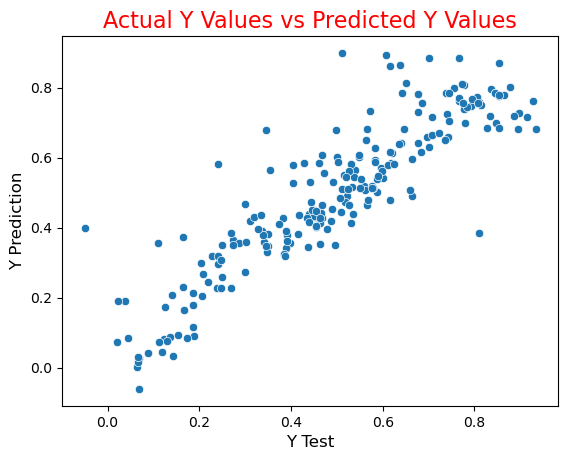

In [3574]:
sns.scatterplot(y_test, y_test_pred, )
plt.title('Actual Y Values vs Predicted Y Values', fontsize = 16, color='r')               
plt.xlabel('Y Test', fontsize = 12)                   
plt.ylabel('Y Prediction', fontsize = 12)
plt.show()